Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.1457 - accuracy: 0.9552 - val_loss: 0.0490 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0660 - val_accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0349 - accuracy: 0.9884 - val_loss: 0.0318 - val_accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0322 - val_accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0374 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0251 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0367 - val_ac

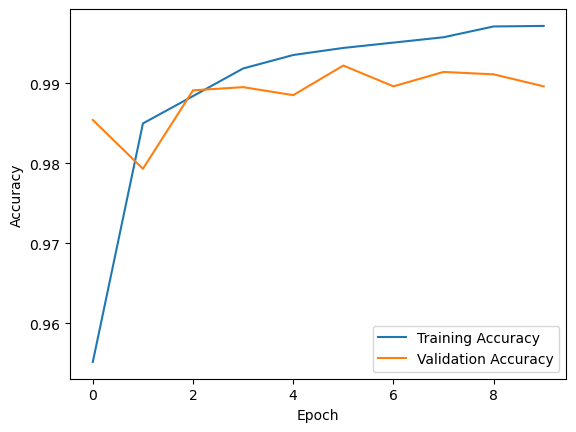

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images (required for CNN input)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

